In [1]:
import pandas as pd

In [7]:
df = pd.read_csv(r"C:\Users\Mustafa\Downloads\KAMP ÖDEV\dava.csv")
df.head()

,Unnamed: 0,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity,Outcome
0,0,132,8,35206,49,2,0
1,1,300,12,46106,46,2,1
2,2,136,2,16411,31,1,1
3,3,101,1,7911,35,1,0
4,4,218,16,6734,33,1,0


In [14]:
#kümeleme metodu olarak k-means seçilir. belirlenen küme sayıları kadar merkez atanır ve her veri noktasını bu oluşturulan merkezlerden en yakınına atar.
#index situnu kümeleme için uygun değildir ve çıkarılmalıdır. 
#outcome sütunu da kümeleme sürecinden çıkarılmalıdır. asıl kğmeleme amacını ortadan kaldırarak basitçe veriyi gruplar.

#kümeleme özelliklerine göre ayırma
#ihtiyacımız olmayan sütunları çıkararak dataframe oluştur
x_cluster = df.drop(columns = ["Unnamed: 0" , "Outcome"])

print("Kümeleme için seçilen özellikler x_cluster değişkeninin ilk 5 satırı olarak alındı:")
print(x_cluster.head())
print(f"Toplam özellik sayısı:{x_cluster.shape[1]}")

Kümeleme için seçilen özellikler x_cluster değişkeninin ilk 5 satırı olarak alındı:
   Case Duration (Days)  Number of Witnesses  Legal Fees (USD)  \
0                   132                    8             35206   
1                   300                   12             46106   
2                   136                    2             16411   
3                   101                    1              7911   
4                   218                   16              6734   

   Number of Evidence Items  Severity  
0                        49         2  
1                        46         2  
2                        31         1  
3                        35         1  
4                        33         1  
Toplam özellik sayısı:5


elbow yöntemi ile optimal küme sayısını belirleme

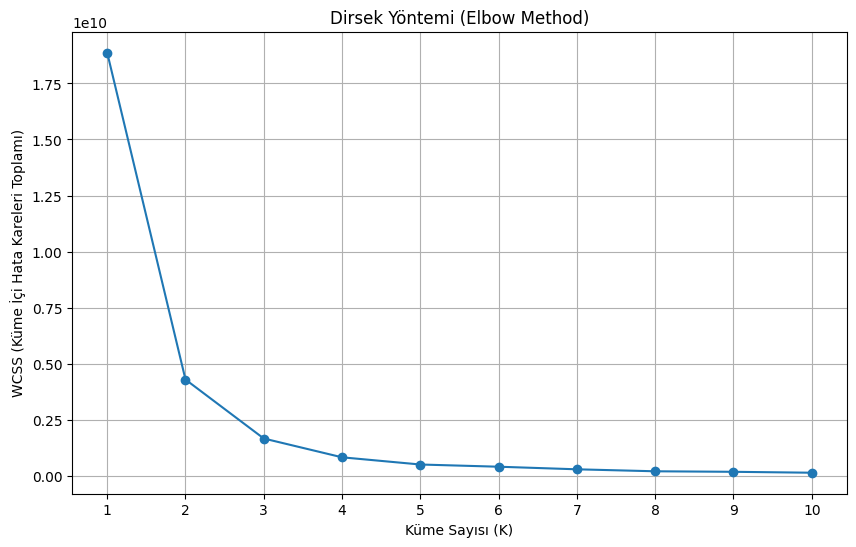

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
K_means_araligi = range(1,11) #1'den 10'a kadar farklı küme sayıları için çalıştırdık.
for k in K_means_araligi:
    kmeans = KMeans(n_clusters=k, random_state = 30, n_init = "auto")
    kmeans.fit(x_cluster)
    wcss.append(kmeans.inertia_) #wcss değerlerini verir

#sonuçları görmek için grafik ile görselleşirdik
plt.figure(figsize=(10, 6))
plt.plot(K_means_araligi, wcss, marker='o', linestyle='-')
plt.title('Dirsek Yöntemi (Elbow Method)')
plt.xlabel('Küme Sayısı (K)')
plt.ylabel('WCSS (Küme İçi Hata Kareleri Toplamı)')
plt.xticks(K_means_araligi)
plt.grid(True)
plt.show()



In [22]:
#kümeler için varsayımsal olarak rastgele bir değer atanır
optimal_k = 5
#seçilen bu değer ile model oluşturulur
kmeans_model = KMeans(
    n_clusters = optimal_k,
    random_state = 30,
    n_init = "auto"
)

#modeli ayrılan x_cluster özellikleri ile eğitme bu şekilde her veri noktası, bir kümenin merkezine atanır
kmeans_model.fit(x_cluster)

#her veri noktsına bir küme numarası atanır. 
küme_numaralari = kmeans_model.labels_

#etiketler orijinal dataframe yapısına eklenir
df["Küme Numaraları"] = küme_numaralari

print(f"Var olan veri seti {optimal_k} kümeye ayrıldı.")
print("Kümeleme etiketleri 'Küme Numaraları' olarak ayrı bir sütunda dataframe'e eklendi.")
print("Oluşturulan küme dağılım:")
print(df["Küme Numaraları"].value_counts())

Var olan veri seti 5 kümeye ayrıldı.
Kümeleme etiketleri 'Küme Numaraları' olarak ayrı bir sütunda dataframe'e eklendi.
Oluşturulan küme dağılım:
Küme Numaraları
2    23
0    22
3    22
1    17
4    16
Name: count, dtype: int64


Küme Merkezleri (Ortalama Değerler)          Case Duration (Days)  Number of Witnesses  Legal Fees (USD)  \
Küme_ID                                                                
0                  216.181818             8.409091       9000.363636   
1                  160.411765             9.529412      35884.941176   
2                  192.956522            10.739130      25119.391304   
3                  218.772727             8.000000      45794.454545   
4                  205.437500             6.750000      15619.250000   

         Number of Evidence Items  Severity  
Küme_ID                                      
0                       25.181818  1.909091  
1                       27.764706  1.882353  
2                       25.173913  1.652174  
3                       28.954545  1.863636  
4                       24.750000  1.875000  


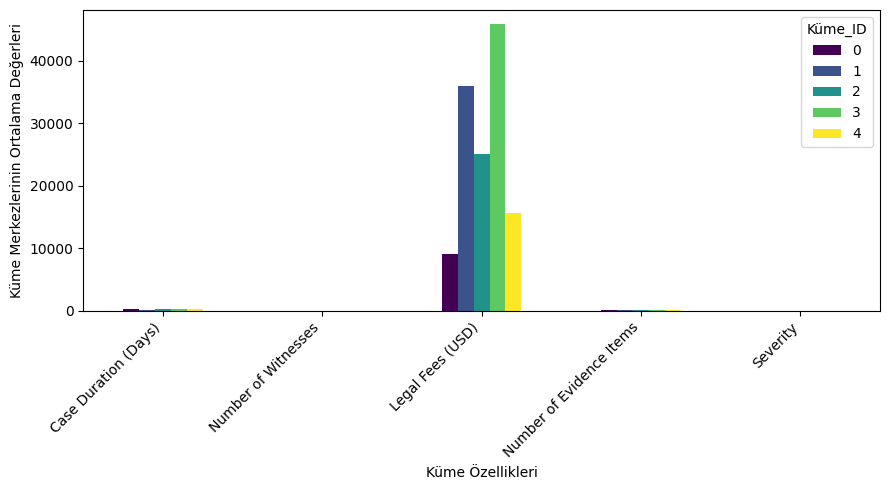

In [24]:
#küme merkezleri, merkeze atanan verilerin ortalamasını ifade eder. 
küme_merkez = pd.DataFrame(
    kmeans_model.cluster_centers_, 
    columns=x_cluster.columns
)

küme_merkez['Küme_ID'] = range(optimal_k)
küme_merkez = küme_merkez.set_index('Küme_ID')

print(f"Küme Merkezleri (Ortalama Değerler) {küme_merkez}")

küme_merkez.T.plot(
    kind='bar', 
    figsize=(9, 5), 
    colormap='viridis'
)

plt.xlabel('Küme Özellikleri')
plt.ylabel('Küme Merkezlerinin Ortalama Değerleri')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()